<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter06/multiclass_classification_PR_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from collections import Counter


def print_ratio(y):
    print(Counter(y))
    counter = Counter(y)
    min_val = min(counter[0], counter[1], counter[2])
    print(
        round(counter[0] / min_val),
        round(counter[1] / min_val),
        round(counter[2] / min_val),
    )

Counter({2: 44473, 1: 16635, 0: 6449})
1 3 7


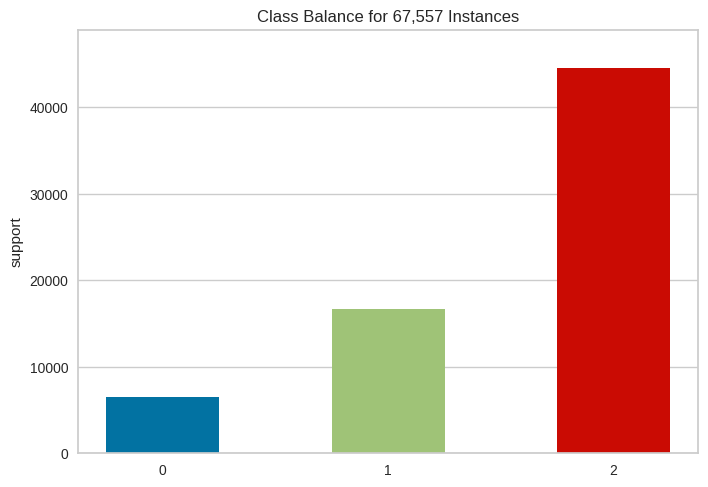

<Axes: title={'center': 'Class Balance for 67,557 Instances'}, ylabel='support'>

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.target import ClassBalance
import math

# Load dataset
X, y = load_game()

# encode categorical variables
X = OrdinalEncoder().fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

print_ratio(y)

# show a nice diagram
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

In [8]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True, stratify=y)
print_ratio(y_test)

Counter({2: 8895, 1: 3327, 0: 1290})
1 3 7


/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


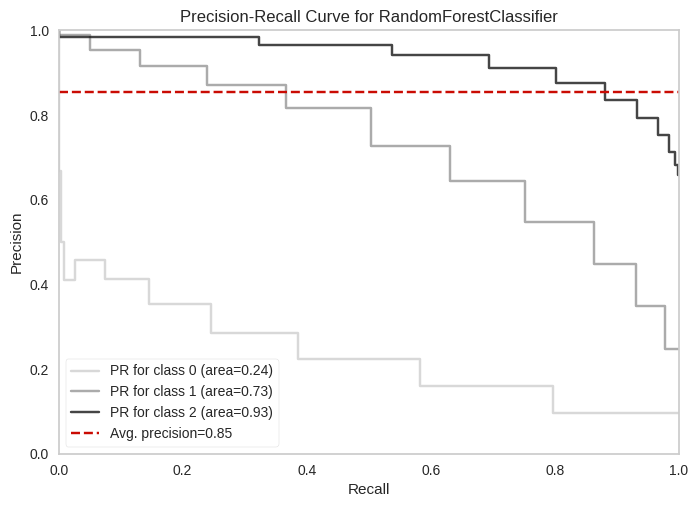

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [9]:
# Plot the visualizer, fit, score, and show
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    colors=["#CFCFCF", "#969696", "#171717"],
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()